In [ ]:
pip install scikit-learn==0.24.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
#Khai báo thư viện
import pandas as pd                                            #Đọc dữ liệu
import matplotlib.pyplot as plt                                #Vẽ biểu đồ
import numpy as np                                             #Xử lý dữ liệu
from sklearn.preprocessing import MinMaxScaler                 #Chuẩn hoá dữ liệu
from keras.callbacks import ModelCheckpoint                    #Lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model                 #Tải mô hình

#Các lớp để xây dựng mô hình
from keras.models import Sequential                            #Đầu vào
from keras.layers import LSTM                                  #(LSTM)
from keras.layers import Dropout                            
from keras.layers import Dense                                 #Đầu ra


#Kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('DATA.csv')

In [ ]:
df.shape

(252, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/30/2021,335.320007,337.779999,328.989990,330.589996,327.521057,42885600
1,12/1/2021,335.130005,339.279999,329.390015,330.079987,327.015808,33337600
2,12/2/2021,330.299988,333.489990,327.799988,329.489990,326.431274,30766000
3,12/3/2021,331.989990,332.700012,318.029999,323.010010,320.011444,41779300
4,12/6/2021,323.950012,327.450012,319.230011,326.190002,323.161926,30032600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
#Mô tả dữ liệu
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,276.981904,280.366269,273.088809,276.733809,275.082692,3.121293e+07
std,30.625298,30.497777,30.193212,30.442985,29.642480,1.099153e+07
min,217.550003,220.410004,213.429993,214.250000,213.647903,9.200800e+06
25%,253.807495,257.545013,249.787503,252.922504,251.686318,2.389085e+07
50%,276.220001,279.134995,271.394989,275.820007,274.147201,2.947600e+07
75%,299.852493,303.155007,294.562508,299.492492,297.123215,3.538080e+07
max,343.149994,344.299988,340.320007,342.540009,339.360168,9.042890e+07


In [ ]:
#Lấy dữ liệu
df1=pd.DataFrame(df,columns=['Date', 'Close'])
df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)

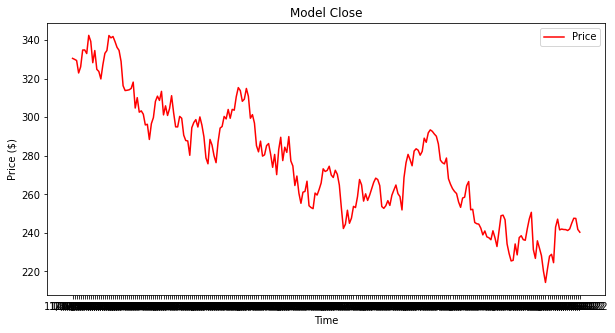

In [ ]:
#Lập biểu đồ giá trị đóng cửa
plt.figure(figsize=(10,5))
plt.plot(df1['Close'],label='Price', color='red')
plt.title('Model Close')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
df1

,Close
Date,
11/30/2021,330.589996
12/1/2021,330.079987
12/2/2021,329.489990
12/3/2021,323.010010
12/6/2021,326.190002
...,...
11/22/2022,245.029999
11/23/2022,247.580002
11/25/2022,247.490005


In [ ]:
#Chia tập dữ liệu
data=df1.values
train_data=data[:200]
test_data=data[200:]

In [ ]:
data

array([[330.589996],
       [330.079987],
       [329.48999 ],
       [323.01001 ],
       [326.190002],
       [334.920013],
       [334.970001],
       [333.100006],
       [342.540009],
       [339.399994],
       [328.339996],
       [334.649994],
       [324.899994],
       [323.799988],
       [319.910004],
       [327.290009],
       [333.200012],
       [334.690002],
       [342.450012],
       [341.25    ],
       [341.950012],
       [339.320007],
       [336.320007],
       [334.75    ],
       [329.01001 ],
       [316.380005],
       [313.880005],
       [314.040009],
       [314.269989],
       [314.980011],
       [318.269989],
       [304.799988],
       [310.200012],
       [302.649994],
       [303.329987],
       [301.600006],
       [296.029999],
       [296.369995],
       [288.48999 ],
       [296.709991],
       [299.839996],
       [308.26001 ],
       [310.980011],
       [308.76001 ],
       [313.459991],
       [301.25    ],
       [305.940002],
       [300.9

In [ ]:
#Chuẩn hoá dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(data)
len(scaler_data)

252

In [ ]:
#Chia tập dữ liệu ban đầu thành x_train, y_train
prediction_days = 30
x_train =[] #danh sách bao gồm các tập chứa dữ liệu của 60 ngày liên tiếp
y_train = [] #danh sách bao gồm các giá trị của các ngày tiếp theo
for x in range(prediction_days, len(scaler_data)):
  x_train.append(scaler_data[x-prediction_days:x, 0])
  y_train.append(scaler_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
#Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(222, 30, 1)

In [ ]:
x_train


array([[[0.90685157],
        [0.90287613],
        [0.8982772 ],
        ...,
        [0.77784708],
        [0.77963974],
        [0.78517425]],

       [[0.90287613],
        [0.8982772 ],
        [0.8477668 ],
        ...,
        [0.77963974],
        [0.78517425],
        [0.8108191 ]],

       [[0.8982772 ],
        [0.8477668 ],
        [0.87255432],
        ...,
        [0.78517425],
        [0.8108191 ],
        [0.7058226 ]],

       ...,

       [[0.15581888],
        [0.11154413],
        [0.18146385],
        ...,
        [0.21669656],
        [0.23992514],
        [0.25980201]],

       [[0.11154413],
        [0.18146385],
        [0.18902485],
        ...,
        [0.23992514],
        [0.25980201],
        [0.2591005 ]],

       [[0.18146385],
        [0.18902485],
        [0.17327925],
        ...,
        [0.25980201],
        [0.2591005 ],
        [0.21443599]]])

In [ ]:
y_train

array([0.8108191 , 0.7058226 , 0.74791492, 0.68906374, 0.69436418,
       0.68087926, 0.63746195, 0.64011216, 0.57868879, 0.64276238,
       0.66716026, 0.73279292, 0.75399489, 0.73669034, 0.77332593,
       0.67815102, 0.71470883, 0.67581266, 0.70395192, 0.75578755,
       0.68695922, 0.62974513, 0.62943327, 0.67207105, 0.66451005,
       0.59614939, 0.5743237 , 0.57268685, 0.5146152 , 0.62623736,
       0.64743933, 0.65897578, 0.62904362, 0.6698885 , 0.63660462,
       0.58936768, 0.50401434, 0.48016215, 0.57876682, 0.5560838 ,
       0.51305638, 0.48476107, 0.56824374, 0.62467854, 0.63114814,
       0.67175919, 0.66185983, 0.7000545 , 0.66443202, 0.70036636,
       0.69709242, 0.75181234, 0.78852597, 0.77644382, 0.73318257,
       0.74183495, 0.78509622, 0.75321536, 0.66451005, 0.67908636,
       0.64478911, 0.55351161, 0.52856804, 0.57190732, 0.51118546,
       0.51656391, 0.55382324, 0.56208574, 0.51882449, 0.46597548,
       0.51812297, 0.43627716, 0.53761007, 0.58757502, 0.49317

In [ ]:
#xếp dữ liệu thành 1 mảng
x_train=np.array(x_train)
y_train=np.array(y_train)

#Xếp lại dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
#Xây dựng mô hình
model = Sequential()
model.add(LSTM(units = 128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
from keras.saving.save import save_model
#Huấn luyện mô hình (train)
save_model ="save_model.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.33361, saving model to save_model.hdf5
5/5 - 4s - loss: 0.3336 - 4s/epoch - 716ms/step
Epoch 2/100

Epoch 2: loss improved from 0.33361 to 0.14247, saving model to save_model.hdf5
5/5 - 0s - loss: 0.1425 - 298ms/epoch - 60ms/step
Epoch 3/100

Epoch 3: loss improved from 0.14247 to 0.10757, saving model to save_model.hdf5
5/5 - 0s - loss: 0.1076 - 460ms/epoch - 92ms/step
Epoch 4/100

Epoch 4: loss did not improve from 0.10757
5/5 - 0s - loss: 0.1078 - 273ms/epoch - 55ms/step
Epoch 5/100

Epoch 5: loss improved from 0.10757 to 0.09458, saving model to save_model.hdf5
5/5 - 0s - loss: 0.0946 - 320ms/epoch - 64ms/step
Epoch 6/100

Epoch 6: loss did not improve from 0.09458
5/5 - 0s - loss: 0.1010 - 276ms/epoch - 55ms/step
Epoch 7/100

Epoch 7: loss improved from 0.09458 to 0.08908, saving model to save_model.hdf5
5/5 - 0s - loss: 0.0891 - 297ms/epoch - 59ms/step
Epoch 8/100

Epoch 8: loss did not improve from 0.08908
5/5 - 0s - loss: 0.0925

In [ ]:
#Dữ liệu train
y_train=scaler.inverse_transform(y_train) #giá thực
final_model=load_model('save_model.hdf5')
y_train_predict=final_model.predict(x_train)
y_train_predict=scaler.inverse_transform(y_train_predict)  #Giá trị dự đoán

7/7 [==============================] - 1s 16ms/step


In [ ]:
#Xử lý dữ liệu test
test=df1[len(train_data)-30:].values
test=test.reshape(-1,1)
scaler_test=scaler.transform(test)

x_test = []
for i in range(30, test.shape[0]): 
  x_test.append(scaler_test[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Dữ liệu test
y_test = data[1000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = scaler.inverse_transform(y_test_predict) #giá dự đoán

2/2 [==============================] - 0s 14ms/step


<ipython-input-26-03553075f5ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Guess']=y_train_predict #Thêm dữ liệu


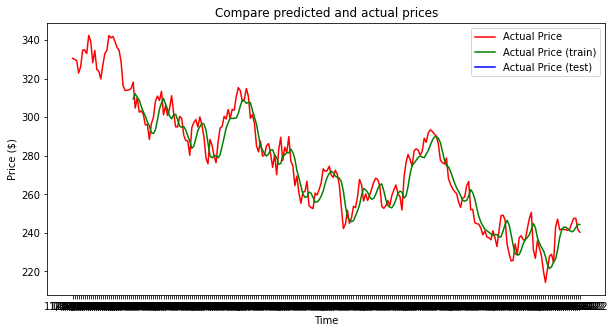

In [ ]:
#Lập biểu đồ so sánh
train_data1=df1[30:1000]
test_data1=df1[1000:]

plt.figure(figsize=(10,5))
plt.plot(df1,label='Actual Price',color='red') #Đường giá trị
train_data1['Guess']=y_train_predict #Thêm dữ liệu
plt.plot(train_data1['Guess'],label='Actual Price (train)',color='green') #Đường giá trị dự báo train
test_data1 ['Guess'] = 52 #Thêm dữ liệu
plt.plot(test_data1['Guess'],label='Actual Price (test)',color='blue') #Đường giá trị dự báo test
plt.title('Compare predicted and actual prices') #Đặt tên biểu đồ
plt.xlabel('Time') #Đặt tên hàm x
plt.ylabel('Price ($)') #Đặt tên hàm y
plt.legend() #Chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#m_a_e
print('Sai số tuyệt đối trung bình tập train:',mean_absolute_error(y_train,y_train_predict))
#m_a_p_e
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.91412199651014
Sai số tuyệt đối trung bình tập train: 5.937731399695595
Phần trăm sai số tuyệt đối trung bình tập train: 0.022242914680864083


In [ ]:
train_data1

,Close,Guess
Date,,
1/12/2022,318.269989,309.536285
1/13/2022,304.799988,312.240631
1/14/2022,310.200012,310.324677
1/18/2022,302.649994,308.928223
1/19/2022,303.329987,305.611877
...,...,...
11/22/2022,245.029999,240.547195
11/23/2022,247.580002,241.088013
11/25/2022,247.490005,242.717255


In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_test,y_test_predict))
#m_a_e
print('Sai số tuyệt đối trung bình tập train:',mean_absolute_error(y_test,y_test_predict))
#m_a_p_e
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_test,y_test_predict))

In [ ]:
test_data1